Tutorials followed creating the notebook:

 - https://ipython-books.github.io/33-mastering-widgets-in-the-jupyter-notebook/
 - https://bretahajek.com/2017/02/widgets-jupyter-ipwigdets/
 - https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/

In [1]:
import ipywidgets as widgets

@widgets.interact
def f(x=5):
    print(x)

interactive(children=(IntSlider(value=5, description='x', max=15, min=-5), Output()), _dom_classes=('widget-in…

In [2]:
# It is the same as
widgets.interact(f, x=5)

interactive(children=(IntSlider(value=5, description='x', max=15, min=-5), Output()), _dom_classes=('widget-in…

<function __main__.f(x=5)>

In [10]:
widgets.interact(f)

interactive(children=(IntSlider(value=5, description='x', max=15, min=-5), Output()), _dom_classes=('widget-in…

<function __main__.f(x=5)>

In [3]:
# Normal slider runs the code whenever the value is changed
# interact_manual provides a button to run the function manually, useful for long lasting functions
widgets.interact_manual(f, x=['a', 'b', 'c'])

interactive(children=(Dropdown(description='x', options=('a', 'b', 'c'), value='a'), Button(description='Run I…

<function __main__.f(x=5)>

In [7]:
# Giving a range
widgets.interact(f, x=(3, 9))

interactive(children=(IntSlider(value=5, description='x', max=9, min=3), Output()), _dom_classes=('widget-inte…

<function __main__.f(x=5)>

In [9]:
# Giving a list of options
widgets.interact(f, x=['this', 'that'])

interactive(children=(IntSlider(value=5, description='x', max=15, min=-5), Output()), _dom_classes=('widget-in…

<function __main__.f(x=5)>

In [13]:
# Giving True/False state
widgets.interact(f, x=True)

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x=5)>

In [14]:
# We can create our widgets too
dir(widgets)

['Accordion',
 'Audio',
 'BoundedFloatText',
 'BoundedIntText',
 'Box',
 'Button',
 'ButtonStyle',
 'CallbackDispatcher',
 'Checkbox',
 'Color',
 'ColorPicker',
 'Controller',
 'CoreWidget',
 'DOMWidget',
 'DatePicker',
 'Datetime',
 'Dropdown',
 'FloatLogSlider',
 'FloatProgress',
 'FloatRangeSlider',
 'FloatSlider',
 'FloatText',
 'GridBox',
 'HBox',
 'HTML',
 'HTMLMath',
 'Image',
 'IntProgress',
 'IntRangeSlider',
 'IntSlider',
 'IntText',
 'Label',
 'Layout',
 'NumberFormat',
 'Output',
 'Password',
 'Play',
 'RadioButtons',
 'Select',
 'SelectMultiple',
 'SelectionRangeSlider',
 'SelectionSlider',
 'SliderStyle',
 'Style',
 'Tab',
 'Text',
 'Textarea',
 'ToggleButton',
 'ToggleButtons',
 'ToggleButtonsStyle',
 'VBox',
 'Valid',
 'ValueWidget',
 'Video',
 'Widget',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__jupyter_widgets_base_version__',
 '__jupyter_widgets_controls_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__protocol_version__',
 '

In [18]:
freq_slider = widgets.FloatSlider(
    value=2.,
    min=1.,
    max=10.0,
    step=0.1,
    description='Frequency:',
    readout_format='.2f',
)
freq_slider

FloatSlider(value=2.0, description='Frequency:', max=10.0, min=1.0)

In [19]:
widgets.interact(f, x=freq_slider.value)

interactive(children=(FloatSlider(value=2.7, description='x', max=8.100000000000001, min=-2.7), Output()), _do…

<function __main__.f(x=5)>

In [22]:
range_slider = widgets.FloatRangeSlider(
    value=[-1., +1.],
    min=-5., max=+5., step=0.1,
    description='xlim:',
    readout_format='.1f',
)
widgets.interact(f, x=range_slider)

interactive(children=(FloatRangeSlider(value=(-1.0, 1.0), description='xlim:', max=5.0, min=-5.0, readout_form…

<function __main__.f(x=5)>

In [23]:
grid_button = widgets.ToggleButton(
    value=False,
    description='Grid',
    icon='check'
)
widgets.interact(f, x=grid_button.value)

interactive(children=(Checkbox(value=False, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x=5)>

In [25]:
title_textbox = widgets.Text(
    value='Hello World',
    description='Title:',
)
widgets.interact(f, x=title_textbox.value)

interactive(children=(Text(value='Hello World', description='x'), Output()), _dom_classes=('widget-interact',)…

<function __main__.f(x=5)>

In [26]:
color_picker = widgets.ColorPicker(
    concise=True,
    description='Background color:',
    value='#efefef',
)
widgets.interact(f, x=color_picker)

interactive(children=(ColorPicker(value='#efefef', concise=True, description='Background color:'), Output()), …

<function __main__.f(x=5)>

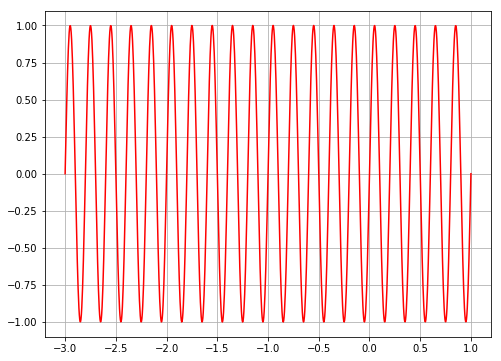

In [42]:
# Combining everything together
import numpy as np
import matplotlib.pyplot as plt

button = widgets.Button(
    description='Plot',
)

def plot2(b=None):
    xlim = range_slider.value
    freq = freq_slider.value
    grid = grid_button.value
    color = color_buttons.value
    title = title_textbox.value
    bgcolor = color_picker.value

    t = np.linspace(xlim[0], xlim[1], 1000)
    f, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(t, np.sin(2 * np.pi * freq * t),
            color=color)
    ax.grid(grid)

@button.on_click
def plot_on_click(b):
    plot2()
    
tab1 = widgets.VBox(children=[freq_slider,
                      range_slider,
                      ])
tab2 = widgets.VBox(children=[color_buttons,
                      widgets.HBox(children=[title_textbox,
                                     color_picker,
                                     grid_button]),
                                     ])

tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'plot')
tab.set_title(1, 'styling')
widgets.VBox(children=[tab, button])

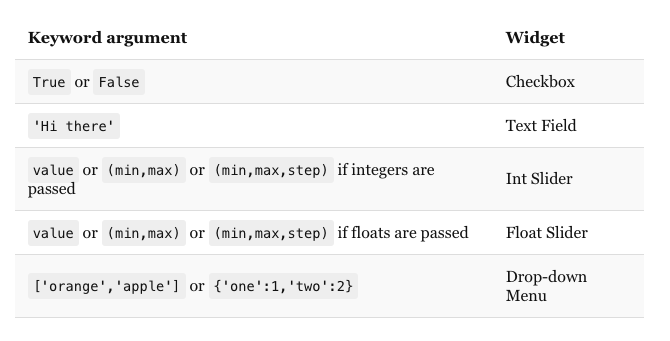